# Steps
 1. Load Data
 2. create Bigrams
 3. Perform one hot encoding
 4. Create model and train
 5. Visulaize results

In [1]:
file = open('royal_data.txt', 'r')
royal_data = file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [3]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', '')
    
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


# Remove stop words and tokenize

In [5]:
stop_words = ['the', 'is', 'are', 'can', 'will', 'be', 'a', 'only', 'thier', 'now', 'and', 'at', 'it']
filter_data = []

for sent in royal_data:
    temp = []
    for word in sent.split():
        if word not in stop_words:
            temp.append(word)
    filter_data.append(temp)

print(filter_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


# Create bigrams

In [9]:
bigrams = []

for i in range(len(filter_data)):
    for j in range(len(filter_data[i])-1):
        for k in range(j+1, len(filter_data[i])):
            bigrams.append([filter_data[i][j], filter_data[i][k]])
            bigrams.append([filter_data[i][k], filter_data[i][j]])
        
print(bigrams)      

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


# Vocabulary

In [15]:
word_set = set()

for i in range(len(bigrams)):
    word_set.add(bigrams[i][0])
    word_set.add(bigrams[i][1])

word_set_list = list(word_set)
word_set_list.sort()
print(word_set_list)

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']


# One hot encoding

In [16]:
word_dict = {}

for i in range(len(word_set_list)):
    word_dict[word_set_list[i]] = i

print(word_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


In [20]:
import numpy as np

onehot_data = np.zeros((len(word_set_list), len(word_set_list)))
onehot_dict = {}

for i in range(len(word_set_list)):
    onehot_data[i][i] = 1
    onehot_dict[word_set_list[i]] = onehot_data[i]
    

for data in onehot_dict:
    print(data, ":", onehot_dict[data])

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
X = []
Y = []

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
    

X = np.array(X)
Y = np.array(Y)
# for i in range(len(bigrams)):
#     print(X[i],":", Y[i])

# Model to train word embeddings

  ![nn model](nn-2.png)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()

vocal_size = len(onehot_data[0])
embed_size = 2

model.add(Input(shape = (vocal_size,)))
model.add(Dense(embed_size, activation = "linear"))
model.add(Dense(vocal_size, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam")

In [ ]:
model.fit(X, Y, epochs = 2500)

Epoch 1/2500
2/2 [==============================] - 0s 2ms/step - loss: 1.4049
Epoch 2/2500
2/2 [==============================] - 0s 2ms/step - loss: 1.4049
Epoch 3/2500
2/2 [==============================] - 0s 3ms/step - loss: 1.4049
Epoch 4/2500
2/2 [==============================] - 0s 2ms/step - loss: 1.4047
Epoch 5/2500
2/2 [==============================] - 0s 2ms/step - loss: 1.4049
Epoch 6/2500
2/2 [==============================] - 0s 2ms/step - loss: 1.4048
Epoch 7/2500
2/2 [==============================] - 0s 5ms/step - loss: 1.4047
Epoch 8/2500
2/2 [==============================] - 0s 4ms/step - loss: 1.4047
Epoch 9/2500
2/2 [==============================] - 0s 2ms/step - loss: 1.4047
Epoch 10/2500
2/2 [==============================] - 0s 2ms/step - loss: 1.4046
Epoch 11/2500
2/2 [==============================] - 0s 3ms/step - loss: 1.4046
Epoch 12/2500
2/2 [==============================] - 0s 3ms/step - loss: 1.4046
Epoch 13/2500
2/2 [==============================

In [39]:
weights = model.get_weights()[0]
word_embeddings = {}

for word in word_set_list:
    word_embeddings[word] = weights[word_dict[word]]

for word in word_set_list:
    print(word, ":", word_embeddings[word])

beautiful : [ 1.4689595 -1.4896191]
boy : [-1.9816382  -0.08055739]
daughter : [ 1.8720506 -1.8419173]
future : [-1.891563    0.36270905]
king : [-1.0327945  -0.49150157]
man : [-0.8151338   0.88258064]
prince : [-0.49909505  1.6707209 ]
princess : [1.9830304 0.4384031]
queen : [ 1.2597557 -2.1819665]
son : [-1.9700788 -1.5689026]
strong : [-1.7851061  -0.11515471]
woman : [2.1152666 0.1432665]


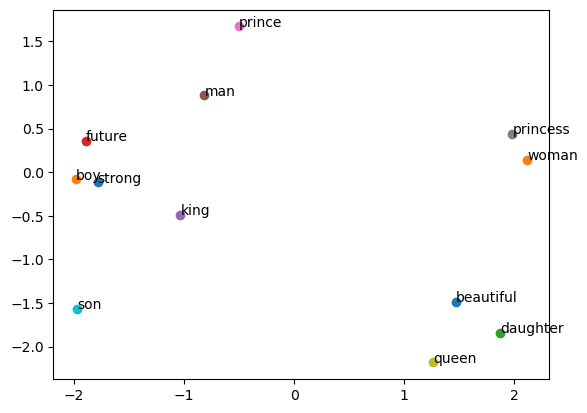

In [40]:
import matplotlib.pyplot as plt

for word in word_set_list:
    cordinates = word_embeddings[word]
    plt.scatter(cordinates[0], cordinates[1])
    plt.annotate(word, (cordinates[0], cordinates[1]))